
<a href="https://githubtocolab.com/Astolfo2332/VIU_act/blob/main/optimizacion/Algoritmos_TP.ipynb" target="_parent\">
<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" > </a>


# Algoritmos de optimización - Seminario<br>
Nombre y Apellidos: Miguel López Vélez <br>
Url: [Trabajo Práctico](https://github.com/Astolfo2332/VIU_act/blob/main/optimizacion/Algoritmos_TP.ipynb)<br>
Problema:
> 1. Sesiones de doblaje <br>
> 2. Organizar los horarios de partidos de La Liga<br>
> 3. Combinar cifras y operaciones

Descripción del problema:

- El problema consiste en analizar el siguiente problema y diseñar un algoritmo que lo resuelva.
- Disponemos de las 9 cifras del 1 al 9 (excluimos el cero) y de los 4 signos básicos de las operaciones fundamentales: suma(+), resta(-), multiplicación(*) y división(/)
- Debemos combinarlos alternativamente sin repetir ninguno de ellos para obtener una cantidad dada. Un ejemplo sería para obtener el 4:

$$
4+2-6/3*1 = 4
$$

Debe analizarse el problema para encontrar todos los valores enteros posibles planteando las siguientes cuestiones:
- ¿Qué valor máximo y mínimo se pueden obtener según las condiciones del problema?
- ¿Es posible encontrar todos los valores enteros posibles entre dicho mínimo y máximo?



(*)¿Cuantas posibilidades hay sin tener en cuenta las restricciones?<br>



¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones.




Respuesta

Inicialmente, debemos determinar las restricciones del problema, las cuales son las siguientes:
- No se pueden repetir los números
- No se pueden repetir los signos
- Se deben alternar los números y los signos
- Los resultados deben ser enteros

De esta forma la cantidad de posibilidades se limitan por el número de signos, ya que solo podemos usar 4 a la vez limita el uso de los números a 5, y estos al no poder repetirse lo vuelve un problema de permutación, porque el orden no importa:

$$
P_{9,5} = \frac{9!}{9!-5!} = 15120
$$

A esto se le debe multiplicar la cantidad de posibles combinaciones de signos sin repetir, lo cual es un problema de permutaciones de la forma:

$$
P_{4} = 4! = 24
$$

Dando como resultado un espacio de:

$$
15120 * 24 = 362880 posibilidades
$$

Ahora agregando la restricción de que el resultado debe ser un número entero, se debe analizar el rango de valores que se pueden obtener y evaluar si pertenecen o no al conjunto de enteros.


Modelo para el espacio de soluciones<br>
(*) ¿Cual es la estructura de datos que mejor se adapta al problema? Argumentalo.(Es posible que hayas elegido una al principio y veas la necesidad de cambiar, argumentalo)

Se puede implementar un diccionario para almacenar el valor de los resultados en la clave y que su valor sea una lista de expresiones que den como resultado dicho valor, facilitando la búsqueda de los valores enteros.

Respuesta

Según el modelo para el espacio de soluciones<br>
(*)¿Cual es la función objetivo?
Estableciendo
$$
N = \{1, 2, 3, 4, 5, 6, 7, 8, 9\}
$$

y

$$
O = \{+, -, *, /\}
$$

$$
f(N, O) = \{x \in \mathbb{Z} \ | \ \text{existe una combinación válida de } N \text{ y } O \text{ tal que } E(N, O) = x\}
$$

Así que la función objetivo es tal que:

$$
\max \left| f(N, O) \right|
$$

y

$$
\min \left| f(N, O) \right|
$$


(*)¿Es un problema de maximización o minimización?

Ambos ya que debemos establecer el máximo y mínimo de la expresión dada.

Diseña un algoritmo para resolver el problema por fuerza bruta

Respuesta

### Método # 1:

Mediante fuerza bruta por generación y eliminación de expresiones.

In [56]:

class Solution:
    def __init__(self, problem:str, operations:list):
        self.problem = list(problem)
        self.operations = operations
        self.rest_dict = {}
        self.result = []
        self.path = []
        self.used = set()
        self.used_op = []
        self.intentos = 0

    def backtrack(self):

        if len(self.path) == 9:
            path = "".join(self.path)
            result = eval(path)
            self.intentos += 1
            # print(path, result)
            if result.is_integer() and path not in self.result:
                self.result.append(path)
                if result not in self.rest_dict:
                    self.rest_dict[result] = [path]
                else:
                    self.rest_dict[result].append(path)
                return False


        if len(self.path) % 2 == 0:
            for num in self.problem:
                if num in self.used:
                    continue
                self.path.append(num)
                self.used.add(num)
                self.problem.remove(num)
                if self.backtrack():
                    return True
                self.path.remove(num)
                self.used.remove(num)
                self.problem.append(num)
        else:
            for op in self.operations:
                if op in self.used_op:
                    continue
                self.path.append(op)
                self.used_op.append(op)
                self.operations.remove(op)
                if self.backtrack():
                    return True
                self.path.remove(op)
                self.operations.append(op)
                self.used_op.remove(op)

        return False

    def find_values(self):
        self.backtrack()
        return self.result



a = '123456789'
operations = ['+', '-', '*', '/']


fuerza_bruta = Solution(a, operations)

a = fuerza_bruta.find_values()

iteraciones_fuerza_bruta = fuerza_bruta.intentos

In [2]:
def continuidad(res_dict):
    min_res = min(res_dict.keys())
    max_res = max(res_dict.keys())
    for i in range(int(min_res), int(max_res)+1):
        if i not in res_dict:
            return False, min_res, max_res
    return True, min_res, max_res

In [6]:

continuo, min_res, max_res = continuidad(fuerza_bruta.rest_dict)

print("Mínimo:", min_res)
print("Máximo:", max_res)
print("Es continuo el resultado?", "si" if continuo else "no")
print("Intentos:", fuerza_bruta.intentos)


Mínimo: -69.0
Máximo: 77.0
Es continuo el resultado? si
Intentos: 362880


### Método # 2:

De una manera más eficiente podemos generar todas las posibles permutaciones del sistema de antemano y a coste de memoria se pueden calcular más rápido que el método anterior.

In [8]:
from itertools import permutations

res_dict = {}

def eval_expresssion(exp, res_dict):
    result = eval(exp)
    if result.is_integer():
        if result in res_dict:
            res_dict[result].append(exp)
        else:
            res_dict[result] = [exp]
    return res_dict

def get_expressions(res_dict, iter_counter):
    #Generamos las permutaciones de numeros
    for nums in permutations('123456789', 5):
        #Generamos las permutaciones de operaciones
        for ops in permutations('+-*/', 4):
            #Unimos los números y las operaciones, recordemos que se pone el número adicional al final
            expression = ''.join([f'{nums[i]}{ops[i]}' for i in range(4)]) + nums[4]
            #Se evalua el valor de la expresión
            res_dict = eval_expresssion(expression, res_dict)
            iter_counter[0] += 1
    return res_dict, iter_counter

res_dict, all_option_counter = get_expressions(res_dict, [0])


In [9]:
continuo, min_res, max_res = continuidad(res_dict)

print("Mínimo:", min_res)
print("Máximo:", max_res)
print("Es continuo el resultado?", "si" if continuo else "no")
print("Intentos:", all_option_counter[0])

Mínimo: -69.0
Máximo: 77.0
Es continuo el resultado? si
Intentos: 362880


Calcula la complejidad del algoritmo por fuerza bruta

Respuesta

En este caso la complejidad es dada por el número de permutaciones de los números y las operaciones, si lo definimos como $m$ y $n$ respectivamente, y sabemos que la permutación esta definida como:

$$
P_{n,k} = \frac{n!}{(n-k)!}
$$

Si los valores de $n$ tienden a $\infty$ la complejidad del algoritmo es del orden factorial de $n$ o $m$, así es igual a $O((n^2)!)$ o $O(n!)$.

(*)Diseña un algoritmo que mejore la complejidad del algortimo por fuerza bruta. Argumenta porque crees que mejora el algoritmo por fuerza bruta

Respuesta
## Métodos Heurísticos

### Aproximación # 1:

Solución por medio de ramificación y poda, con restricciones para números enteros, podando esa rama si se encuentra que el resultado parcial no es un número entero, mediante un algoritmo de búsqueda en profundidad.

En este caso se considera que se pueden perder ramas que después de una división dicho valor puede ser un entero, pero por orden de operaciones, este valor será repetido invirtiendo el orden de las operaciones. Por ejemplo:

- $1/3$ No es entero pero podría ser $1/3*6$, entonces esa posibilidad solo se dara en el caso de $6/3*1$. Por lo que se puede perder la posibilidad de encontrar un entero si se poda la rama.

De manera gráfica se puede representar como:

<div style="text-align: center;">
<img src="https://raw.githubusercontent.com/Astolfo2332/VIU_act/main/optimizacion/imgs/grafo.png" alt = "Grafo de ramas de búsqueda" width="400"/>
<p><em>Fig 1. Gráfico de ramas de búsqueda</em></p>
</div>


Por el momento tomaremos como metrica de desempeño las iteraciones para encontrar una solución y los valores mínimo, máximo encontrados y si es continuo o no.



In [51]:

def evaluar_expresion(expresion):
    """Evalúa la expresión y retorna el resultado si es entero, None si no lo es."""
    resultado = eval(expresion)
    if isinstance(resultado, int) or resultado.is_integer():
        return int(resultado)
    return None

def dfs(numeros, operadores, expresion, resultado_actual, usados_numeros, usados_operadores, min_max, iter_counter, res_dict):
    """Búsqueda en profundidad con poda para encontrar solo el mínimo y máximo."""
    if len(expresion) == 9:  # Si ya usamos 5 numeros y 4 operadores

        if resultado_actual not in res_dict:
            res_dict[resultado_actual] = [expresion]
        else:
            res_dict[resultado_actual].append(expresion)

        if resultado_actual is not None:
            min_max[0] = min(min_max[0], resultado_actual)  # Actualizar mínimo
            min_max[1] = max(min_max[1], resultado_actual)  # Actualizar máximo
        return

    #Gracias al orden de los numeros podemos "guardar" los que hemos usado
    for i, num in enumerate(numeros):
        if i in usados_numeros:
            continue  # Evita reutilizar números

        for j, op in enumerate(operadores):
            if j in usados_operadores:
                continue  # Evita reutilizar operadores

            nueva_expresion = f"{expresion}{op}{num}"
            nuevo_resultado = evaluar_expresion(nueva_expresion)

            iter_counter[0] += 1

            if nuevo_resultado is not None:  # Poda: Solo continuar pro la rama si es entero
                dfs(numeros, operadores, nueva_expresion, nuevo_resultado, usados_numeros | {i}, usados_operadores | {j}, min_max, iter_counter, res_dict)

def buscar_min_max(print_results=False):
    iter_counter = [0]
    res_dict = {}
    """Encuentra solo los valores mínimo y máximo posibles."""
    numeros = list(range(1, 10))  # Cifras del 1 al 9
    operadores = ['+', '-', '*', '/']
    min_max = [float('inf'), float('-inf')]  # Inicializar mínimo y máximo

    for num_inicial in numeros:
        dfs(numeros, operadores, str(num_inicial), num_inicial, {numeros.index(num_inicial)}, set(), min_max, iter_counter, res_dict)

    if not print_results:
        return min_max, iter_counter

    print("Iteraciones", iter_counter)
    print("Mejora con respecto al método anterior:", f"{100 - iter_counter[0] / fuerza_bruta.intentos * 100 : .2f}","%")
    continuo, _, _ = continuidad(res_dict)
    print("Es continuo el resultado?", "si" if continuo else "no")
    return min_max

# Ejecutar búsqueda
min_val, max_val = buscar_min_max(True)
print("Mínimo:", min_val)
print("Máximo:", max_val)


Iteraciones [199230]
Mejora con respecto al método anterior:  95.01 %
Es continuo el resultado? si
Mínimo: -69
Máximo: 77


Con esta aproximación obtenemos una mejora del 45.1 % con respecto a la fuerza bruta eliminando la mitad de los calculos necesarios y manteniendo la continuidad de los resultados.

## Aproximación # 2:

Podemos agregar memoria al algoritmo de búsqueda en profundidad para evitar recalcular ramas que ya se han calculado, de esta forma se puede mejorar la eficiencia del algoritmo.

En este caso como conocemos las posiciones tanto de operadores como signos, podemos guardarlas en un diccionario para cada vez que se cumplan de nuevo ese patrón, podar la rama y evitar obtener el mismo valor.

Esto conlleva a un problema, debido a que se pueden perder ramas que cumplan con ser números enteros pero al no llegar a su estado final no se guarda el resultado dando casos como por ejemplo:

- Si se explora $1 + 2 * 3$ y se decide guardar la rama no se explorará $1 + 2 * 3 / 4$ que puede dar un número entero.



In [49]:
def dfs_memo(numeros, operadores, expresion, resultado_actual, usados_numeros, usados_operadores, min_max, iter_counter, res_dict, memo):
    """Búsqueda en profundidad con poda para encontrar solo el mínimo y máximo con memoización."""
    clave = (tuple(usados_numeros), tuple(usados_operadores))
    if clave in memo:
        return  # Evitar cálculos repetidos

    if len(expresion) == 9:  # Si ya usamos 5 números y 4 operadores
        if resultado_actual not in res_dict:
            res_dict[resultado_actual] = [expresion]
        else:
            res_dict[resultado_actual].append(expresion)

        min_max[0] = min(min_max[0], resultado_actual)  # Actualizar mínimo
        min_max[1] = max(min_max[1], resultado_actual)  # Actualizar máximo
        return

    memo[clave] = True  # Guardar en memoización

    for i, num in enumerate(numeros):
        if i in usados_numeros:
            continue  # Evita reutilizar números

        for j, op in enumerate(operadores):
            if j in usados_operadores:
                continue  # Evita reutilizar operadores

            nueva_expresion = f"{expresion}{op}{num}"
            nuevo_resultado = evaluar_expresion(nueva_expresion)

            iter_counter[0] += 1

            if nuevo_resultado is not None:  # Poda: Solo continuar por la rama si es entero
                dfs_memo(numeros, operadores, nueva_expresion, nuevo_resultado, usados_numeros | {i}, usados_operadores | {j}, min_max, iter_counter, res_dict, memo)

def buscar_min_max_memo(print_results=False):
    iter_counter = [0]
    res_dict = {}
    memo = {}  # Diccionario de memoización

    """Encuentra solo los valores mínimo y máximo posibles."""
    numeros = list(range(1, 10))  # Cifras del 1 al 9
    operadores = ['+', '-', '*', '/']
    min_max = [float('inf'), float('-inf')]  # Inicializar mínimo y máximo

    for num_inicial in numeros:
        dfs_memo(numeros, operadores, str(num_inicial), num_inicial, {numeros.index(num_inicial)}, set(), min_max, iter_counter, res_dict, memo)

    if not print_results:
        return min_max, iter_counter

    print("Iteraciones", iter_counter)
    print("Mejora con respecto al método anterior:", f"{100 - iter_counter[0] / fuerza_bruta.intentos * 100 : .2f}","%")
    continuo, _, _ = continuidad(res_dict)
    print("Es continuo el resultado?", "si" if continuo else "no")

    return min_max

# Ejecutar búsqueda
min_val, max_val = buscar_min_max_memo(True)
print("Mínimo:", min_val)
print("Máximo:", max_val)


Iteraciones [11751]
Mejora con respecto al método anterior:  99.71 %
Es continuo el resultado? no
Mínimo: -69
Máximo: 77


Así en este algoritmo se pierde la continuidad de los resultados debido a la poda temprana de algunas ramas que pueden llegar a estos resultados por cumplir con patrones previamente descartados en la búsqueda. Más, sin embargo, se encuentran los máximos y mínimos de las soluciones

### Comparación de métodos heurísticos

Aunque una medida de tiempo no es lo mejor para comparar estos métodos se puede observar cual es más eficiente en términos de tiempo de ejecución.

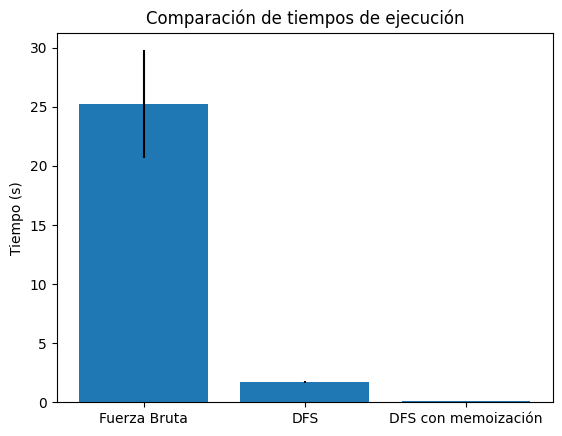

In [58]:
import time
import matplotlib.pyplot as plt
import numpy as np

def time_test(func):
    start = time.time()
    func()
    end = time.time()
    return end - start

brute_force_time = [time_test(lambda: fuerza_bruta.find_values()) for _ in range(10)]
dfs_time = [time_test(buscar_min_max) for _ in range(10)]
dfs_memo_time = [time_test(buscar_min_max_memo) for _ in range(10)]

brute_mean, brute_std = np.mean(brute_force_time), np.std(brute_force_time)
dfs_mean, dfs_std = np.mean(dfs_time), np.std(dfs_time)
dfs_memo_mean, dfs_memo_std = np.mean(dfs_memo_time), np.std(dfs_memo_time)

plt.bar(['Fuerza Bruta', 'DFS', 'DFS con memoización'], [brute_mean, dfs_mean, dfs_memo_mean], yerr=[brute_std, dfs_std, dfs_memo_std])
plt.ylabel('Tiempo (s)')
plt.title('Comparación de tiempos de ejecución')
plt.show()


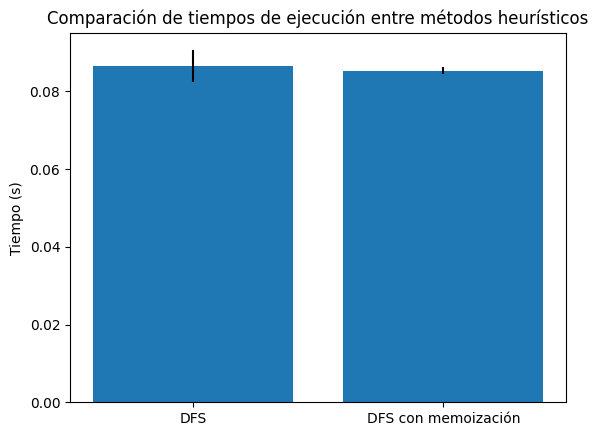

In [40]:
plt.bar(['DFS', 'DFS con memoización'], [dfs_mean, dfs_memo_mean], yerr=[dfs_std, dfs_memo_std])
plt.ylabel('Tiempo (s)')
plt.title('Comparación de tiempos de ejecución entre métodos heurísticos')
plt.show()

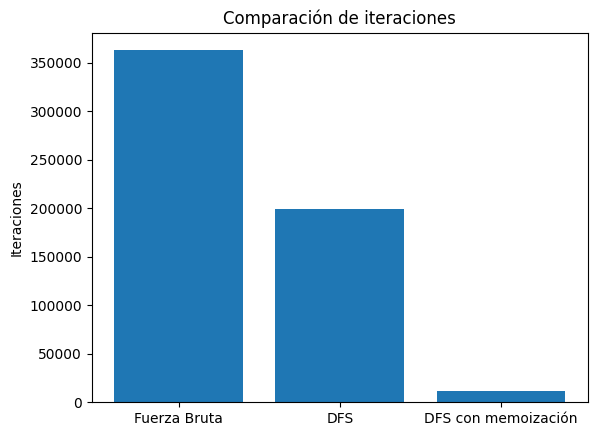

In [57]:
plt.bar(['Fuerza Bruta', 'DFS', 'DFS con memoización'], [iteraciones_fuerza_bruta, buscar_min_max()[1][0], buscar_min_max_memo()[1][0]])
plt.ylabel('Iteraciones')
plt.title('Comparación de iteraciones')
plt.show()

## Métodos metaheurísticos


### Aproximación # 1:
Algoritmo genético

In [96]:
import random
from collections import namedtuple

# Definir operadores disponibles
OPS = ['+', '-', '*', '/']
NUMBERS = list(range(1, 10))

# Definir estructura de una expresión matemática
Expression = namedtuple('Expression', ['expr', 'value'])

# Evaluar una expresión matemáticamente
def evaluar_expresion(expresion):
    resultado = eval(expresion)
    if len(list(set(expresion))) != 9:  # Verificar que no se repitan números
        return None

    # Verificamos que el resultado sea un entero
    if isinstance(resultado, int) or (isinstance(resultado, float) and resultado.is_integer()):
        return int(resultado)

    return None

# Generar una expresión aleatoria sin repetir números u operadores
def generar_expresion():
    numeros_disponibles = random.sample(NUMBERS, 5)  # Escoger 5 números sin repetir
    operadores_disponibles = random.sample(OPS, 4)  # Escoger 4 operadores sin repetir

    #Generamos la expresión
    expr = str(numeros_disponibles[0])
    for i in range(4):
        expr += operadores_disponibles[i] + str(numeros_disponibles[i + 1])

    #Se evalua y de lo contrario se genera una nueva hasta tener una expresión válida
    value = evaluar_expresion(expr)
    return Expression(expr, value) if value is not None else generar_expresion()

# Selección de mejores individuos
def seleccion(poblacion, top_n=10):
    poblacion_valida = [expr for expr in poblacion if expr.value is not None]
    # Seleccionamos a los mejores individuos organizando los valores, recordando que se busca el máximo y el mínimo
    return sorted(poblacion_valida, key=lambda x: x.value)[:top_n] + sorted(poblacion_valida, key=lambda x: x.value)[-top_n:]

# Cruce entre 3 expresiones
def cruce(expr1, expr2, expr3):
    # Combinamos las expresiones

    nums1, ops1 = extraer_componentes(expr1.expr)
    nums2, ops2 = extraer_componentes(expr2.expr)
    nums3, ops3 = extraer_componentes(expr3.expr)

    # Se combinan los números y operadores de las expresiones
    nums1 = nums1[:2] + nums2[2:4] + nums3[4:]
    ops1 = ops1[:2] + ops2[2:4] + ops3[4:]

    nueva_expr = str(nums1[0])
    for i in range(4):
        nueva_expr += ops1[i] + str(nums1[i + 1])

    nuevo_valor = evaluar_expresion(nueva_expr)
    #Si el valor es invalido se retorna la primera expresión
    return Expression(nueva_expr, nuevo_valor) if nuevo_valor is not None else expr1

# Extraer números y operadores de una expresión
def extraer_componentes(expr):
    nums = [int(n) for n in expr if n.isdigit()]
    ops = [o for o in expr if o in OPS]
    return nums, ops

# Mutación aleatoria de una expresión sin repetir números u operadores
def mutacion(expr):
    #La mutación la definimos como una reorganización aleatoria de los números y operadores
    nums, ops = extraer_componentes(expr.expr)
    random.shuffle(nums)
    random.shuffle(ops)

    nueva_expr = str(nums[0])
    for i in range(4):
        nueva_expr += ops[i] + str(nums[i + 1])

    nuevo_valor = evaluar_expresion(nueva_expr)
    #Se evalua la expresión y se retorna si es válida de lo contrario se retorna la expresión original
    return Expression(nueva_expr, nuevo_valor) if nuevo_valor is not None else expr

# Algoritmo genético
def algoritmo_genetico(generaciones=100, poblacion_size=50):
    poblacion = [generar_expresion() for _ in range(poblacion_size)]
    for i in range(generaciones):
        poblacion = seleccion(poblacion)
        nueva_poblacion = []

        # Conservamos algunos de los mejores individuos
        nueva_poblacion.extend(sorted(poblacion, key=lambda x: x.value)[:2] + sorted(poblacion, key=lambda x: x.value)[-2:])

        while len(nueva_poblacion) < poblacion_size:

            p1, p2, p3 = random.sample(poblacion, 3)

            hijo = cruce(p1, p2, p3)
            if random.random() < 0.2:  # Probabilidad de mutación
                hijo = mutacion(hijo)
            nueva_poblacion.append(hijo)

        poblacion = nueva_poblacion

        if i % 25 == 0:
            min_val, max_val = min(poblacion, key=lambda x: x.value), max(poblacion, key=lambda x: x.value)
            print("Máximo y minimo de la población", i, ":", min_val.value, max_val.value)


    min_val = min(poblacion, key=lambda x: x.value)
    max_val = max(poblacion, key=lambda x: x.value)
    return min_val, max_val

# Ejecutar algoritmo
total_generaciones = 50
total_poblacion = 500
min_expr, max_expr = algoritmo_genetico(total_generaciones, total_poblacion)

print(f"Mínimo encontrado: {min_expr.expr} = {min_expr.value}")
print(f"Máximo encontrado: {max_expr.expr} = {max_expr.value}")



Máximo y minimo de la población 0 : -65 77
Máximo y minimo de la población 25 : -65 77
Mínimo encontrado: 5-8*9+6/3 = -65
Máximo encontrado: 9*8+7-2/1 = 77


En este caso se experimentan con varios valores de generaciones y total de población, los mejores resultados se encuentran a valores altos de población y pocas generaciones, teniendo menor efecto la cantidad de generaciones, ya que los algoritmos generadores y la segregación de los mejores individuos es más efectiva en la población inicial.

(*)Calcula la complejidad del algoritmo



Respuesta

Según el problema (y tenga sentido), diseña un juego de datos de entrada aleatorios

Respuesta

Aplica el algoritmo al juego de datos generado

Respuesta

Enumera las referencias que has utilizado(si ha sido necesario) para llevar a cabo el trabajo

Respuesta

Describe brevemente las lineas de como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño

Respuesta